<a href="https://colab.research.google.com/github/manikur/R-programming/blob/gh-pages/Price_NSEI%26VIXS%26P500_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price NSEI Analysis with Python

In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [5]:
nsei = yf.download('^NSEI',
 start='2020-01-01',
 end='2021-08-22',
 progress=False)

In [6]:
nsei.tail(9)

Open          High  ...     Adj Close  Volume
Date                                    ...                      
2021-08-09  16281.349609  16320.750000  ...  16258.250000  240500
2021-08-10  16274.799805  16359.250000  ...  16280.099609  288000
2021-08-11  16327.299805  16338.750000  ...  16282.250000  277900
2021-08-12  16303.650391  16375.500000  ...  16364.400391  280200
2021-08-13  16385.699219  16543.599609  ...  16529.099609  321900
2021-08-16  16518.400391  16589.400391  ...  16563.050781  254000
2021-08-17  16545.250000  16628.550781  ...  16614.599609  297400
2021-08-18  16691.949219  16701.849609  ...  16568.849609  251800
2021-08-20  16382.500000  16509.550781  ...  16450.500000  350800

[9 rows x 6 columns]

In [ ]:
nsei.head()

Open          High  ...     Adj Close  Volume
Date                                    ...                      
2020-01-01  12202.150391  12222.200195  ...  12182.500000  304100
2020-01-02  12198.549805  12289.900391  ...  12282.200195  407700
2020-01-03  12261.099609  12265.599609  ...  12226.650391  428800
2020-01-06  12170.599609  12179.099609  ...  11993.049805  396500
2020-01-07  12079.099609  12152.150391  ...  12052.950195  447800

[5 rows x 6 columns]

In [7]:
import matplotlib.pyplot as plt

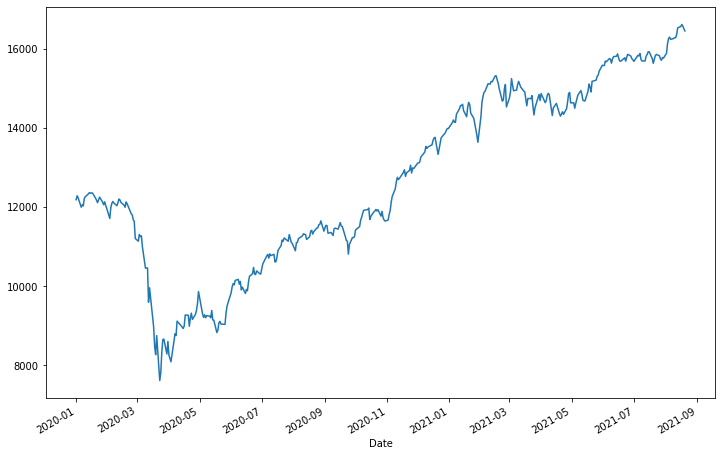

In [8]:
nsei['Close'].plot(figsize=(12,8))

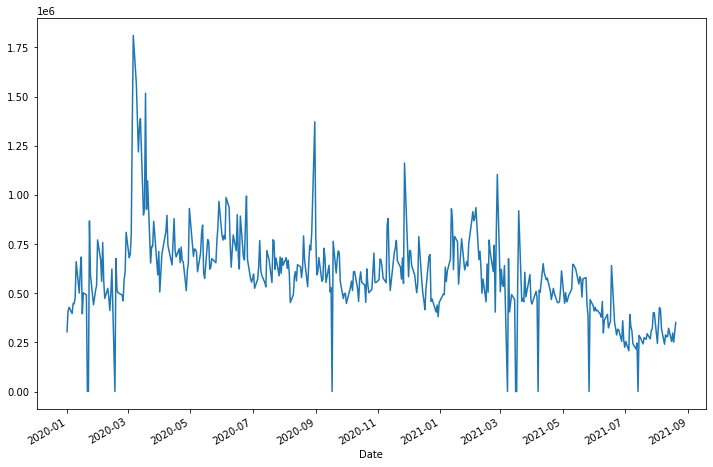

In [10]:
nsei['Volume'].plot(figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f1855910>,
      dtype=object)

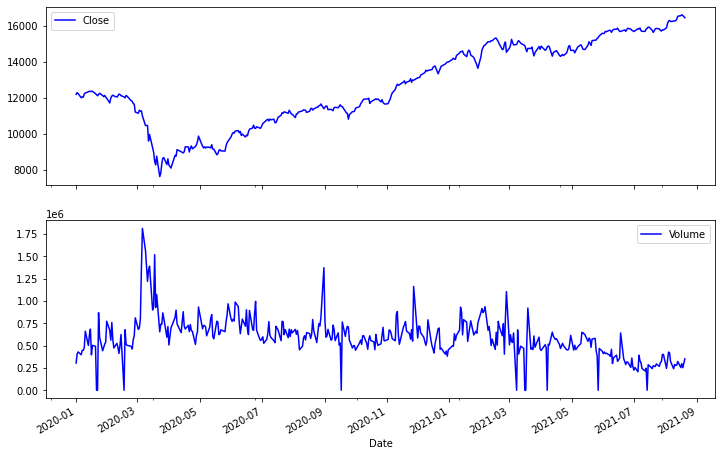

In [11]:
nsei[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8))

In [12]:
nsei.describe()

Open          High  ...     Adj Close        Volume
count    406.000000    406.000000  ...    406.000000  4.060000e+02
mean   12707.641124  12784.933603  ...  12695.160835  5.868562e+05
std     2279.883723   2261.125969  ...   2282.381315  2.265674e+05
min     7735.149902   8036.950195  ...   7610.250000  0.000000e+00
25%    11185.937744  11239.462158  ...  11155.800293  4.674250e+05
50%    12200.350098  12256.149902  ...  12220.225098  5.817000e+05
75%    14796.225342  14882.350098  ...  14817.974854  6.874500e+05
max    16691.949219  16701.849609  ...  16614.599609  1.811000e+06

[8 rows x 6 columns]

In [13]:
nsei['simple_rtn'] = nsei.Close.pct_change()

In [14]:
nsei['log_rtn'] = np.log(nsei.Close/nsei.Close.shift(1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f065ef50>],
      dtype=object)

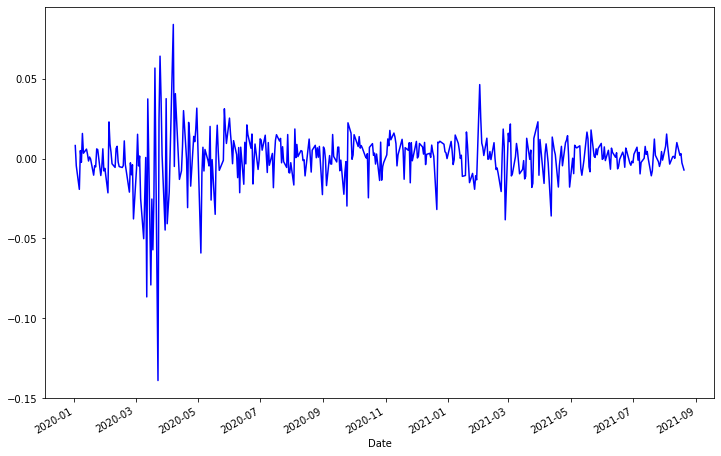

In [15]:
nsei['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [16]:
nsei['log_rtn'].tail(12)

Date
2021-08-04    0.007907
2021-08-05    0.002199
2021-08-06   -0.003467
2021-08-09    0.001234
2021-08-10    0.001343
2021-08-11    0.000132
2021-08-12    0.005033
2021-08-13    0.010014
2021-08-16    0.002052
2021-08-17    0.003107
2021-08-18   -0.002757
2021-08-20   -0.007169
Name: log_rtn, dtype: float64

In [31]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns

In [32]:
init_notebook_mode()

In [33]:
df_rolling = nsei[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])

In [34]:
df_rolling.columns = df_rolling.columns.droplevel()

In [20]:
df_outliers = nsei.join(df_rolling)

In [66]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [53]:
df = yf.download(['^NSEI', '^VIX'],
start='1985-01-01',
end='2021-08-22',
progress=False)

In [54]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^NSEI': 'nsei', '^VIX': 'vix'})

In [55]:
df.tail()

nsei        vix
Date                               
2021-08-16  16563.050781  16.120001
2021-08-17  16614.599609  17.910000
2021-08-18  16568.849609  21.570000
2021-08-19           NaN  21.670000
2021-08-20  16450.500000  18.559999

In [56]:
df['log_rtn'] = np.log(df.nsei / df.nsei.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [57]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'NSEI log returns'),
 Text(0.5, 1.0, 'NSEI vs. VIX ($\\rho$ = -0.21)')]

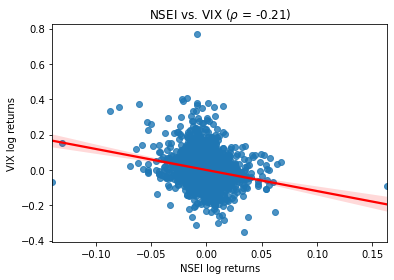

In [58]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'NSEI vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='NSEI log returns')

In [59]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

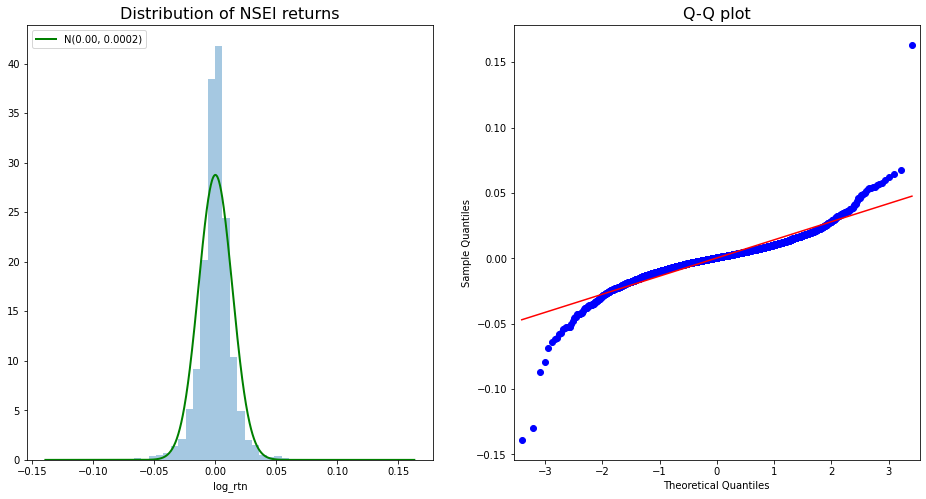

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of NSEI returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [61]:
df['log_rtn'].tail()

Date
2021-08-12    0.005033
2021-08-13    0.010014
2021-08-16    0.002052
2021-08-17    0.003107
2021-08-18   -0.002757
Name: log_rtn, dtype: float64

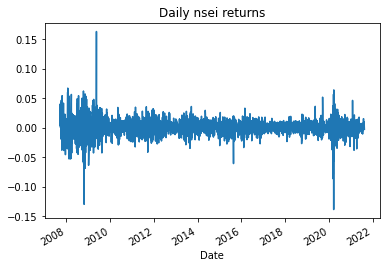

In [63]:
df.log_rtn.plot(title='Daily nsei returns')

In [67]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

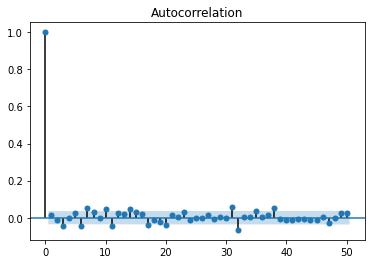

In [68]:
acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

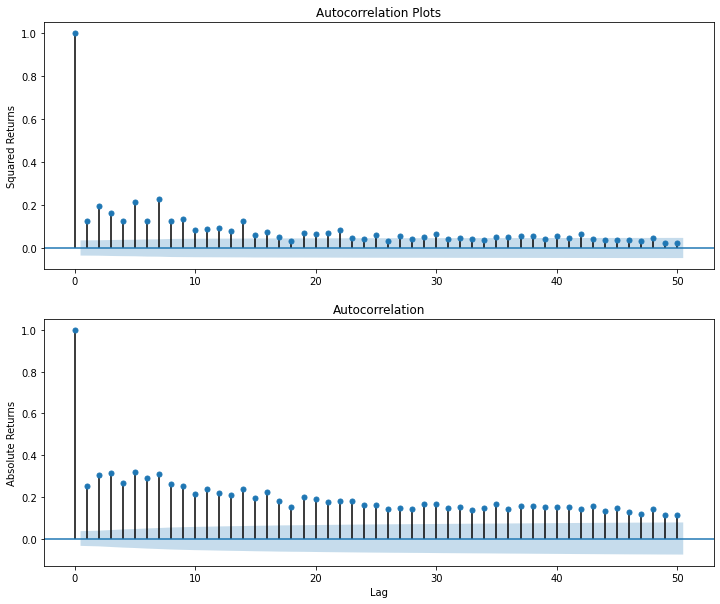

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [70]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

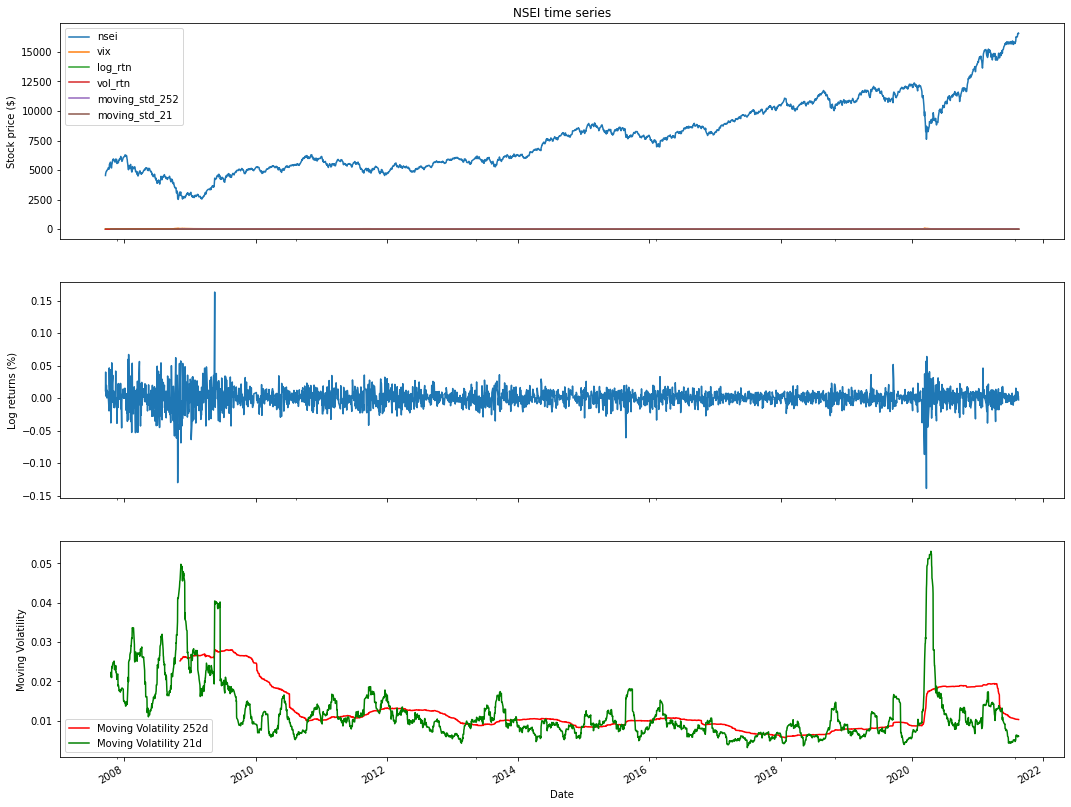

In [72]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='NSEI time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()

**Price S&P500 Analysis with Python**

In [73]:
df = yf.download(['^GSPC', '^VIX'],
start='1985-01-01',
end='2021-08-22',
progress=False)

In [74]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

In [75]:
df.tail()

sp500        vix
Date                              
2021-08-16  4472.939941  16.120001
2021-08-17  4448.080078  17.910000
2021-08-18  4400.270020  21.570000
2021-08-19  4405.799805  21.670000
2021-08-20  4441.669922  18.559999

In [76]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [77]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'S&P 500 log returns'),
 Text(0.5, 1.0, 'S&P 500 vs. VIX ($\\rho$ = -0.71)')]

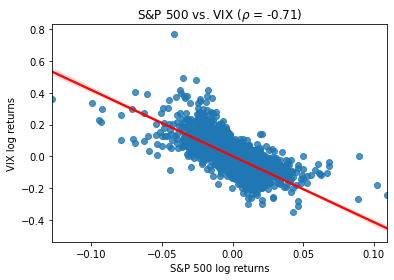

In [78]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='S&P 500 log returns')

In [79]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

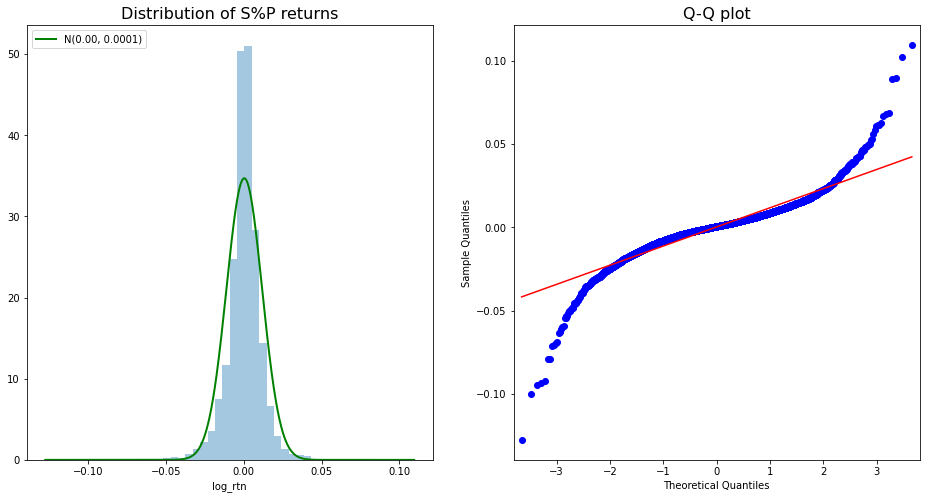

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of S%P returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [81]:
df['log_rtn'].tail()

Date
2021-08-16    0.001105
2021-08-17   -0.005573
2021-08-18   -0.010807
2021-08-19    0.001256
2021-08-20    0.008109
Name: log_rtn, dtype: float64

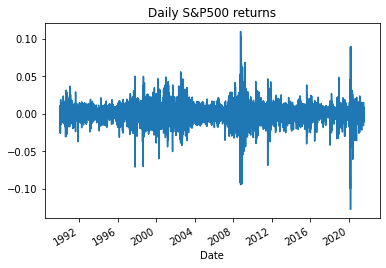

In [82]:
df.log_rtn.plot(title='Daily S&P500 returns')

In [83]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

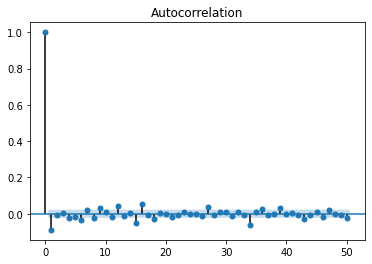

In [84]:

acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

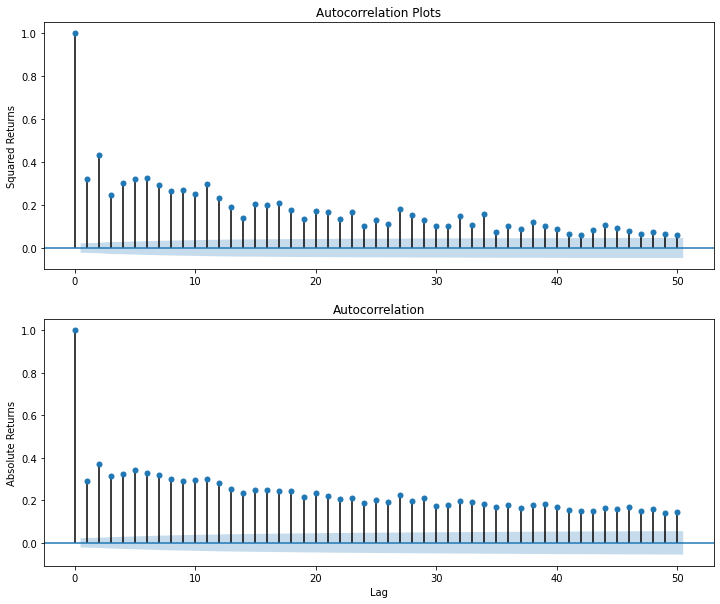

In [85]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [86]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

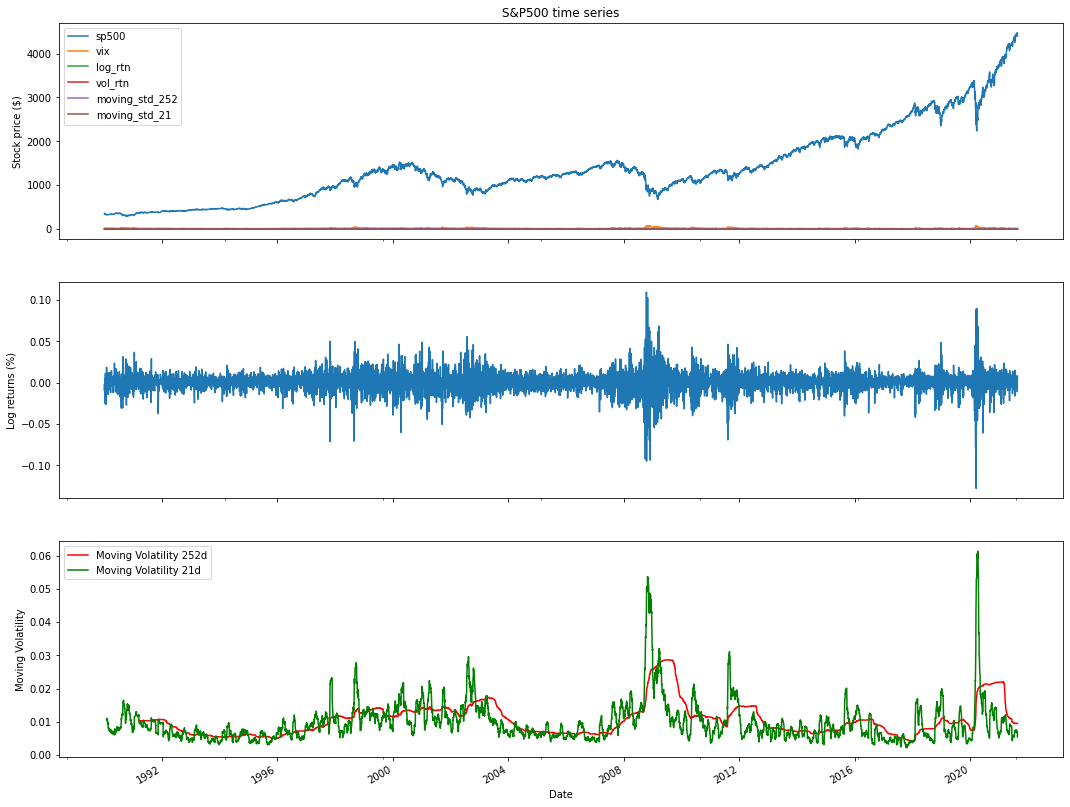

In [87]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='S&P500 time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()